# Лабораторна робота №17

In [20]:
import numpy as np
from openpyxl import load_workbook
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
wb = load_workbook(filename='./Salary.xlsx')
ws = wb["Лист1"]

/usr/local/lib/python3.11/site-packages/openpyxl/reader/drawings.py:29: UserWarning: DrawingML support is incomplete and limited to charts and images only. Shapes and drawings will be lost.
  warn("DrawingML support is incomplete and limited to charts and images only. Shapes and drawings will be lost.")


In [22]:
def safe_string_to_float(val, default=np.nan):
    try:
        return float(val)
    except (ValueError, TypeError):
        return default

In [23]:
firstCol = 1
firstRow = 4
nYears = 16
nCols = nYears + 2  
nRows = 29

allCells = np.array([[cell.value for cell in row] for row in ws.iter_rows()])
data = allCells[(firstRow-1):(firstRow-1+nRows),(firstCol-1):(firstCol-1+nCols)]

years = data[0, 2:]

all_salaries = np.array([
    [safe_string_to_float(val,0) for val in row] for row in data[1:, 2:]
])
ukraine_avg_salary = all_salaries[0]
regions_salary = all_salaries[1:]

### Clusterization of time series

In [24]:
seed = 42
np.random.seed(seed)
X_train = regions_salary[:]
np.random.shuffle(X_train)
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
X_train = TimeSeriesResampler(sz=50).fit_transform(X_train)

sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

0.043 --> 0.028 --> 0.028 --> 


In [25]:
silhouette_score(X_train, y_pred, metric="dtw")   

0.70649688810163

### Visualization

/var/folders/l4/mm204gf13v78xdl4v3kgd6zcckkh80/T/ipykernel_48232/93770410.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-", marker='x', linewidth=0.01, linestyle='--')


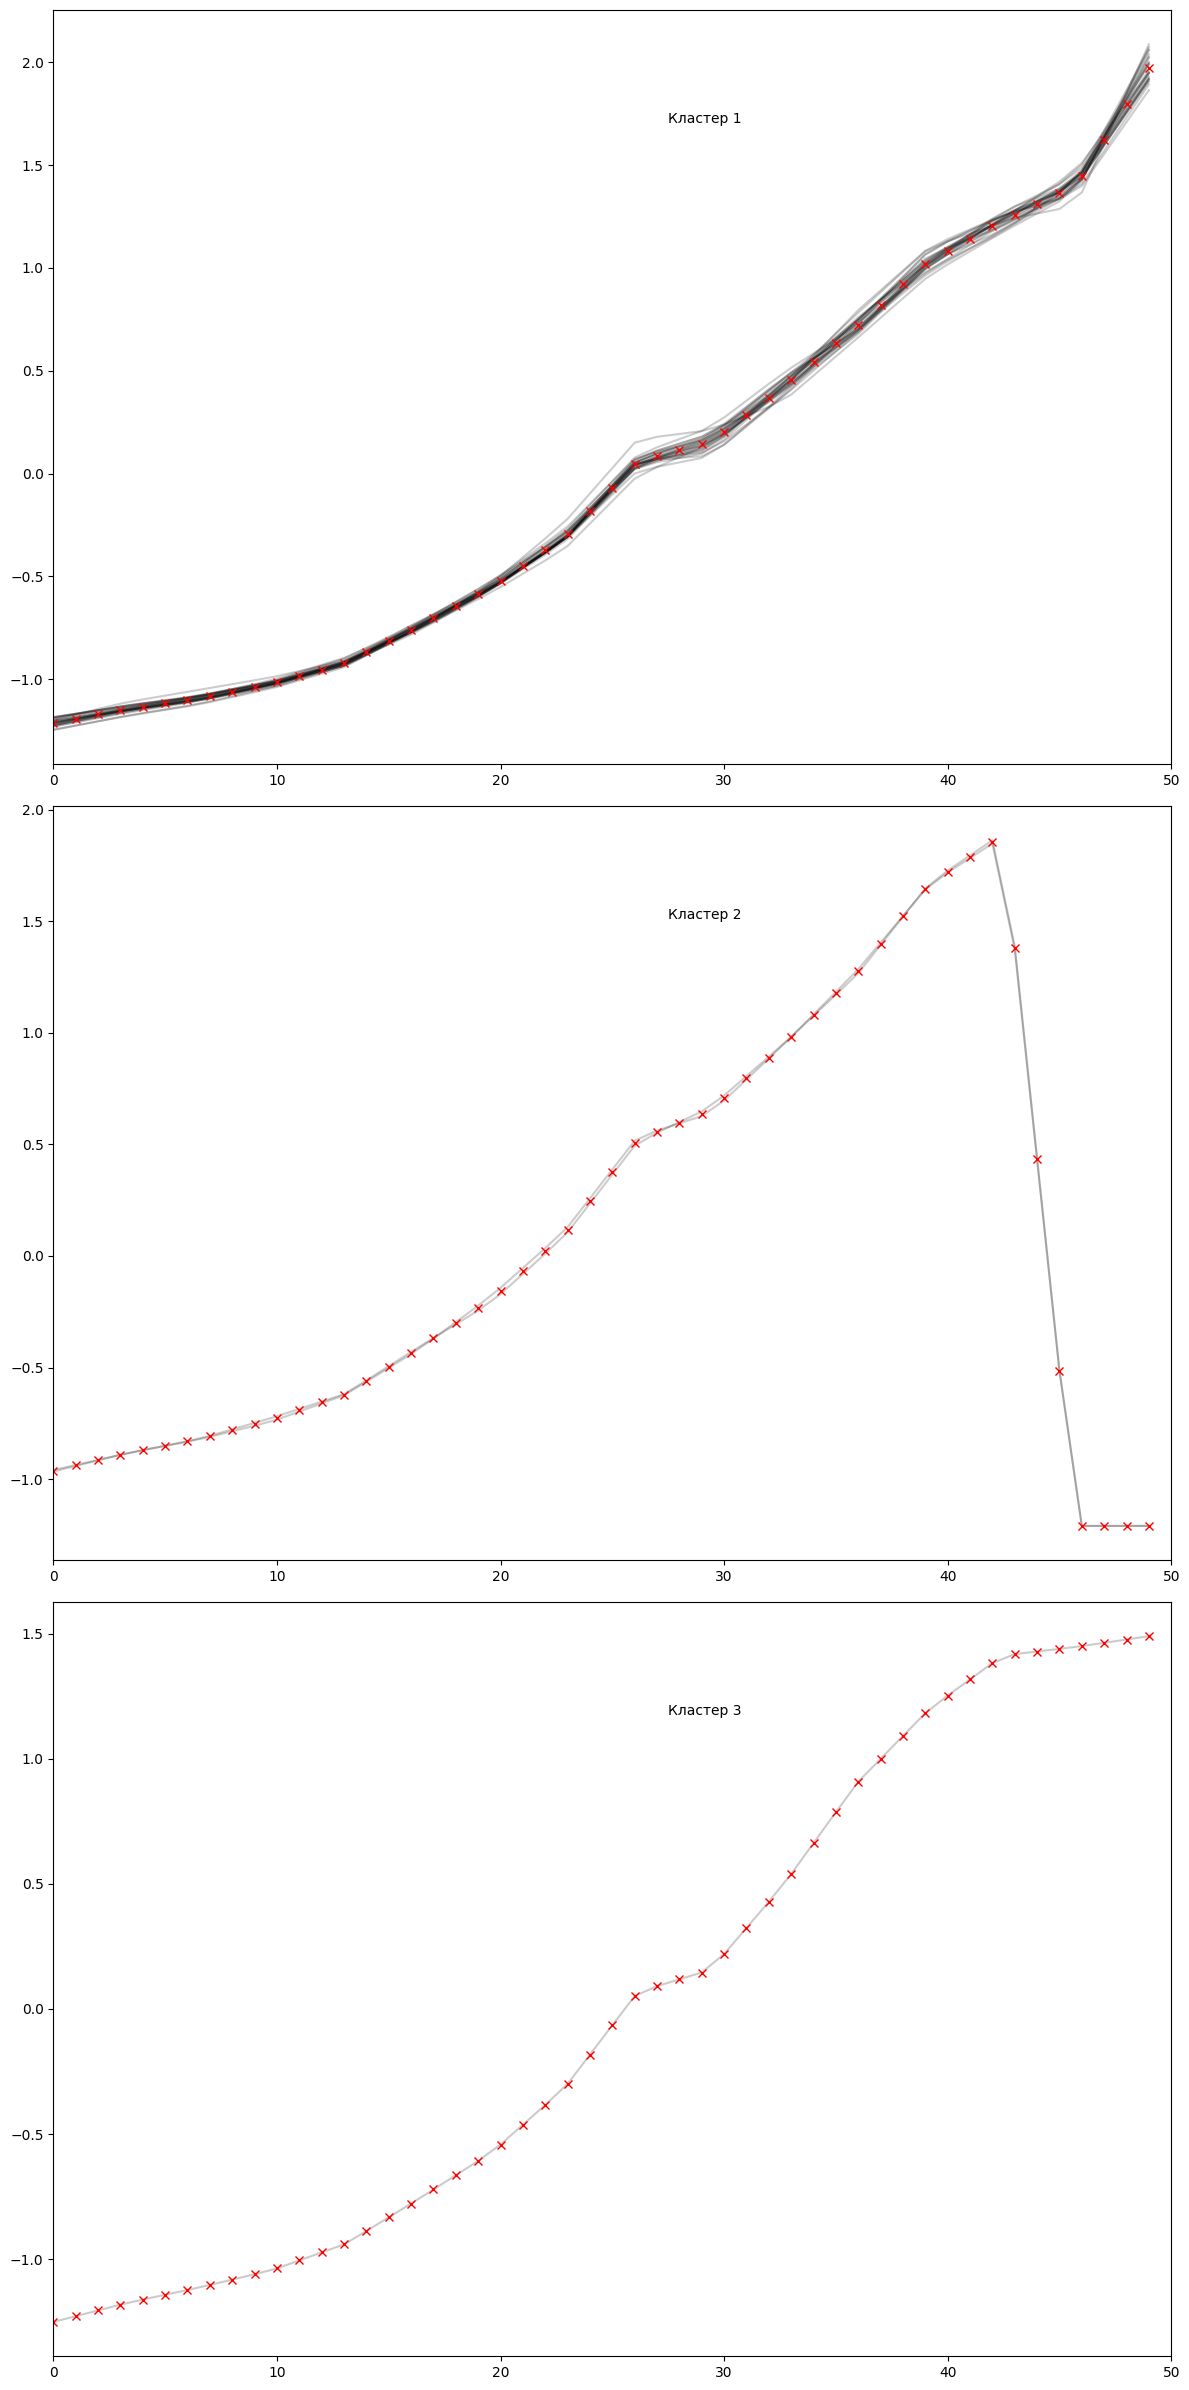

In [26]:
plt.rcParams["figure.figsize"] = (12, 24) # (w, h)

for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-", marker='x', linewidth=0.01, linestyle='--')
    
    plt.xlim(0, X_train.shape[1])
    plt.text(0.55, 0.85,'Кластер %d' % (yi + 1),
             transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()